## <center> <span style="color:indigo">Привет, Аибек!</span></center>

(поправь меня пожалуйста если я не правильно написал твое имя)

Меня зовут **Максим Слотин** 🧔

Я буду делать ревью твоего проекта. Как ревьюер я в первую очередь хочу поделиться своим опытом и помочь тебе стать аналитиком данных, а не просто указать на твои ошибки)

Если не против, я буду обращаться к тебе на "ТЫ". Если это неприемлемо, обязательно напиши мне в комментариях - мы прейдем на "ВЫ".

Мои комментарии будут в ячейках "Комментарий от ревьюера". Тут же будет видно по результатам какой проверки сделаны комментарии.

<div class="alert alert-danger"> 
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Красным цветом обозначены комментарии, на которые тебе нужно обратить внимание в первую очередь, чтобы я принял проект. 
</div>
<div class="alert alert-warning">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Желтым цветом отмечено то, что ты можешь сделать немного по другому. Ты можешь учесть эти комментарии при выполнении следующих проектов.
</div>
<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Зелёным цветом обозначены твои удачные решения, которые ты без сомнения можешь применять в будущих проектах.
</div>

#### Пожалуста, не удаляй мои комментарии и относись к ним бережно. При повторной проверке, я буду ориентироваться на них. 

###### Можешь под моими комментариями оставлять свои, в которых опиши свои испарвления. Это облегчит процесс проверки и мне, и тебе  :) 

Например, вот так:

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ ОТ УЧЕНИКА:</b>
</div>
---

## <span style="color:indigo">Общий вывод по результатам проверки №1</span>

Проект принят 🤗

Да, да, ты сдал его с первого раза, что говорит о том, что работа действительно хорошая. Ты показываешь отличное владение визуальными инструментами, очень граммотно рассуждаешь и делаешь корректные выводы.

Единственное это то, что можно было бы добавить чуть больше своих рассуждений, но ты во многих местах в проекте оставлася краток) Так же в некторых местах я бы предложил тебе автоматизировать отрисовку графиков через цикл или собственную функцию. Ниже я оставил ряд желтых (развивающих) комментариев, рекомендую ознакомиться

Поздравляю с завершением начального этапа обучения в Яндекс.Практикуме, далее проекты будут еще <s>сложнее</s> интереснее!

А пока можешь довольствоваться своей хорошо выполненной работой:

<img src="https://cs11.pikabu.ru/post_img/2019/01/31/10/154895313514759034.jpg" width="500">

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [208]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [209]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
# добавил разделитель, чтобы прочитать данные корректно 

In [210]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [211]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Потолок в 100м вызывает подозрение

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Очень много NaN, необходимо проанализировать 

In [213]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [214]:
# функция для вычисления процента пропущенных значений в каждом столбце
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of NaN'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of NaN', ascending=False).round(1)
        return mz_table

missing_zero_values_table(df)

,Zero Values,Missing Values,% of NaN,Data Type
is_apartment,2725,20924,88.3,object
parks_nearest,0,15620,65.9,float64
ponds_nearest,0,14589,61.6,float64
balcony,3758,11519,48.6,float64
ceiling_height,0,9195,38.8,float64
airports_nearest,1,5542,23.4,float64
cityCenters_nearest,0,5519,23.3,float64
parks_around3000,10106,5518,23.3,float64
ponds_around3000,9071,5518,23.3,float64
days_exposition,0,3181,13.4,float64


<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Очень граммотно, прям огонь 🔥
    
Многим студентам рекомендую всегда проводить оценку значимости пропусков перед решением о том что с пропусками делать
    
Выводы супер
</div>

### Вывод

**is_apartment** - кажется, что "0" это не аппартаменты, так как люди могли не знать различие между аппартаментами и обычной квартирой. Соответсвенно люди пропускали этот пункт при заполнении формы, а те кто точно знал(разбирающиеся в этом вопросе), заполнили корректно, т.е. указали что это аппартаменты \
**balcony** - предполагаю что NaN это "0" \
**ceiling_height** - пропущено 38.8% значений, есть значения введение вручную некорректно(27 вместо 2.7). Надо добавить проверку ввода данных, чтобы не превышало 10 и меньше 2.5. \
**days_exposition** - важный параметр. Неизвестно, забыл ли продавец убрать объявление после закрытой сделки или действительно объявление "висит" долго из-за некоторых причин. Думаю, лучше не трогать ничего, так среднее значение или медиана не подойдут \
**parks_around3000**, **ponds_around3000**, **parks_nearest**, **ponds_nearest** - данные просто не были заполнены \
**cityCenters_nearest** - оставлю значения как есть \
**kitchen_area**, **living_area** - важные параметры, думаю если знать жилую площадь, то можно предположить примерно площать кухни


### Шаг 2. Предобработка данных

**is_apartment**

In [215]:
df['is_apartment'] = df['is_apartment'].fillna(False)

**balcony**

In [216]:
df['balcony'] = df['balcony'].fillna(0)

**ceiling_height**

In [217]:
# вычислим медиану относительно этажности дома
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [218]:
# заменяем значения высоты потолков на общую медиану для отсутствующих значений этажности дома
for floor in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

# медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for floor in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == floor), 
             'ceiling_height'] = ceiling_medians.loc[floor, 'median']

# посчитаем количество пропущенных значений после проделанной замены
df['ceiling_height'].isna().value_counts()

False    23699
Name: ceiling_height, dtype: int64

<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Интересное решение)
</div>

**days_exposition**

In [219]:
df.dropna(subset = ['days_exposition'], inplace = True)

**parks_around3000**, **ponds_around3000**, **parks_nearest**, **ponds_nearest**

In [220]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

**floors_total**

In [221]:
df.dropna(subset=['floors_total'], inplace=True)

**kitchen_area**, **living_area**

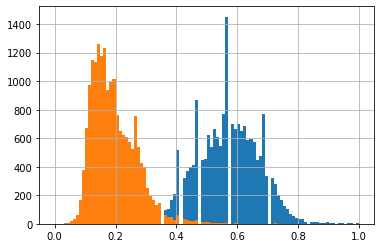

In [222]:
# вычислим соотношение жилой площади от общей, а также площади кухни от общей
df['part_living_area'] = round(df['living_area'] / df['total_area'], 2)
df['part_kitchen_area'] = round(df['kitchen_area'] / df['total_area'], 2)
df['part_living_area'].hist(bins=100, range=(0, 1))
df['part_kitchen_area'].hist(bins=100, range=(0, 1))

In [223]:
# как видно из графика выше, средний процент жилой площади от общей ~58%, кухонной ~17%
# по этому принципу заполним данные для пропущенных значений
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.55)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * 0.15)

<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Метод супер)
</div>

**Замена типов данных**

In [224]:
df['floors_total'] = df['floors_total'].astype('int')
df['last_price'] = df['last_price'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['locality_name'] = df['locality_name'].str.lower()
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-warning">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Аибек, в целом все хорошо, но ты не очень многословен)
    
Не хватает твоих рассждений, гипотез на тему почему могли возникнуть пропуски, а так же почему ты решаешь обработать их именно так, а не иначе
    
Так же это не критично, но есть определенная неоднонроднасть в заполнении locality_name по одним и тем же населенным пунктам, было бы здорово, если бы ты на это обратил внимание
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

цена квадратного метра

In [225]:
df['price_per_sqm'] = round(df['last_price'] / df['total_area'], 1)

день недели, месяц и год публикации объявления

In [226]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

этаж квартиры; варианты — первый, последний, другой

In [227]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой'

соотношение жилой и общей площади, а также отношение площади кухни к общей

In [228]:
df['living_area_ratio'] = round(df['living_area'] / df['total_area'], 3)
df['kitchen_area_ratio'] = round(df['kitchen_area'] / df['total_area'], 3)

<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Тут все как надо  👍
</div>

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Изучение следующих параметров: площадь, цена, число комнат, высота потолков

In [229]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,20441.000000,2.044100e+04,20441.000000,20441.000000
mean,58.857697,6.265166e+06,2.024999,2.727620
std,34.061930,1.087821e+07,1.055000,0.978734
min,12.000000,1.219000e+04,0.000000,1.000000
25%,39.580000,3.400000e+06,1.000000,2.550000
50%,50.800000,4.500000e+06,2.000000,2.650000
75%,67.800000,6.500000e+06,3.000000,2.750000
max,900.000000,7.630000e+08,19.000000,100.000000


Выводы по предварительному анализу: \
total_area - есть квартира в 12 и 900 кв.м., но среднее значение вполнее адекватное \
last_price - вполне реалистичные значение, все зависит от факторов \
rooms - 19 комнат, возможно общежитие или офис \
ceiling_height - от 1 до 100 м, надо убрать эти данные

**Гистограммы**

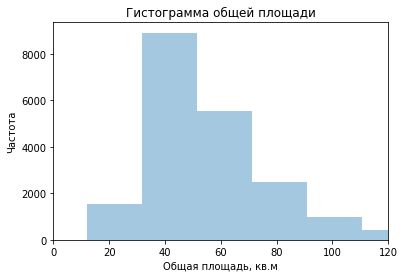

In [230]:
# Построим диаграмму для объектов с площадью менее 120 кв.м.
sns.distplot(df['total_area'], kde=False, bins=45)
plt.xlim(0, 120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

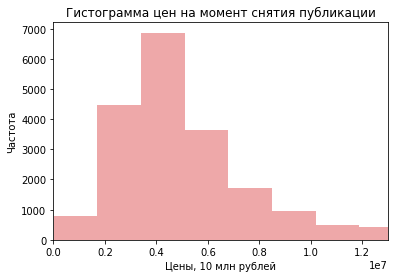

In [231]:
sns.distplot(df['last_price'], kde=False, bins=450, color='tab:red')
plt.xlim(0, 13000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

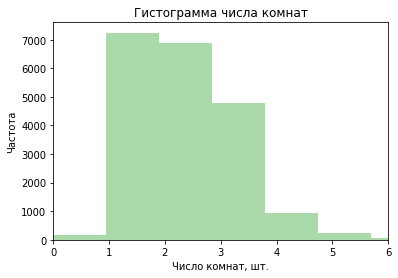

In [232]:
sns.distplot(df['rooms'], kde=False, bins=20, color='tab:green')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

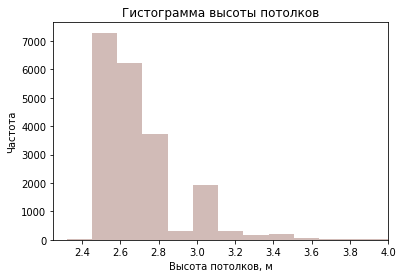

In [233]:
sns.distplot(df['ceiling_height'], kde=False, bins=750, color='tab:brown')
plt.xlim(2.25, 4)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

**Убираем редкие и выбивающиеся значения на основании гистограмм**

In [234]:
df_query = df
#Примем срок продажи квартиры возможным от 3 недель и до 1 года
df_query = df_query.query('days_exposition > 14 & days_exposition < 365')

#Высота потолков в хрущевках в среднем 2.4 метра, в элитном жилье больше 3 метров
df_query = df_query.query('ceiling_height > 2 & ceiling_height < 4')

#На сайте недвижимости были найдены квартииры максимум с 8 комнатами. Возьмем с запасом 13 комнат как максимум.
df_query = df_query.query('rooms < 6') 


<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Ок, согласен
</div>

**Время продажи квартиры**

In [235]:
df['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [236]:
df['days_exposition'].median()

95.0

max - квартира продавалась почти 5 лет, среднее знечение - 180 дней, медианное значение 95 дней (3 месяца - неплохо). 

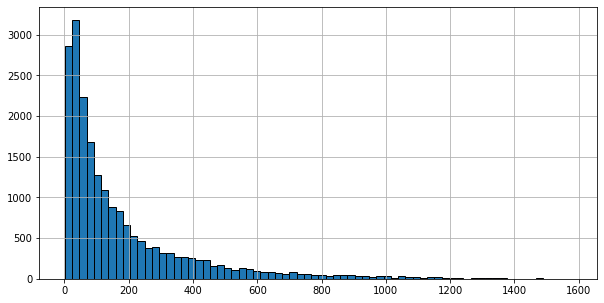

In [237]:
df['days_exposition'].hist(bins=70, figsize=(10,5), ec='black')

Как видно на графике, квартиры продаются в течение двух месяцев после публикации. 

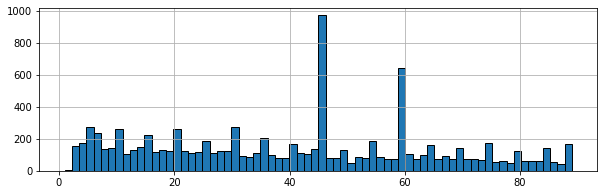

In [238]:
# посмотрим детальнее сроки до 90 дней
df.query('days_exposition<90')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black')

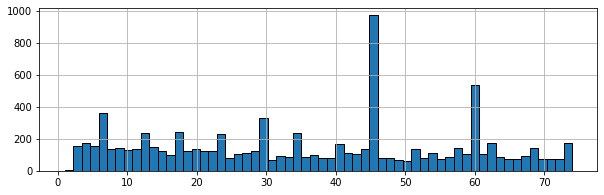

In [239]:
df.query('days_exposition<75')['days_exposition'].hist(bins=60, figsize=(10,3), ec='black')

Странно, но кажется система каждые 15 дней запрашивает продал ли квартиру продавец, соответсвенно заносится дата опроса.

<div class="alert alert-warning">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
На самом деле тут лучше всего отвечать на этот вопрос, смотря на "ящик с усами" по колонке время продажи
    
Размер ящика и его крайних усов и будут как раз определителями быстрой и медленной продажи, так же будут показаны выбросы, которые здесь значительные, судя по тому как различаются между собой среднее и медиана
    
Так было бы удобнгее и точнее

</div>

**Факторы, влияющие на стоимость квартиры**

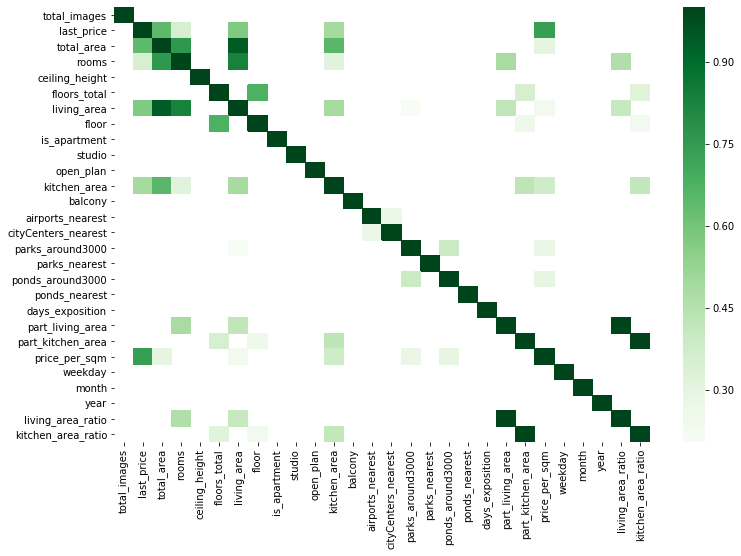

In [240]:
corr = df.corr()

kot = corr[corr>=.2]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

<div class="alert alert-warning">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Это очень здоровский инструмент для визуализации корреляции, молодец
    
Если бы ты еще сразу выбрал бы только те колонки для которых расчет корреляции релевантен, то вообще было бы здорово

</div>

Согласно correlation matrix на стоимость квартиры влияют следующие факторы: total_are, living_area, kitchen_area, price_per_sqm. Что и так понятно 

<div class="alert alert-warning">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Ну не знаю, ты так говоришь как будто из графика ноль информации
    
Обрати внимание какого темно-зеленого цвета living_area и какого светлозеленого цвета kitchen_area, т.е. в данном случае нельзя говорить, что total_are, living_area, kitchen_area, price_per_sqm одинаково влияют на стоимость квартиры. Было бы здорово, если бы ты это отметил сам)

</div>

                price_per_sqm
floor_category               
другой               96766.55
первый               80152.70
последний            86060.00


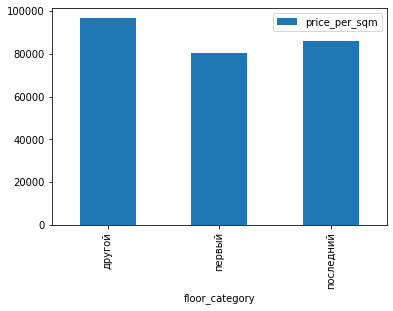

In [241]:
pivot_floor = df_query.pivot_table(index='floor_category', values='price_per_sqm', aggfunc='median')
pivot_floor.plot(y='price_per_sqm', kind ='bar')
print(pivot_floor)

На первом этаже квартиры дешевле, а "другие" самые дорогие

         price_per_sqm
weekday               
0             93548.40
1             94059.60
2             94228.15
3             93901.30
4             93007.00
5             92500.00
6             93636.40


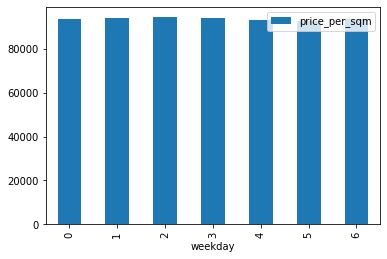

In [242]:
pivot_weekday = df_query.pivot_table(index='weekday', values ='price_per_sqm', aggfunc='median')
pivot_weekday.plot(y='price_per_sqm', kind ='bar')
print(pivot_weekday)

Квартиры выставленные с понедельника по четверг дороже, чем в другие дни

       price_per_sqm
month               
1           93750.00
2           93333.30
3           95122.00
4           92052.65
5           92167.65
6           91304.30
7           94293.10
8           95874.30
9           94805.00
10          92954.50
11          94324.30
12          91666.70


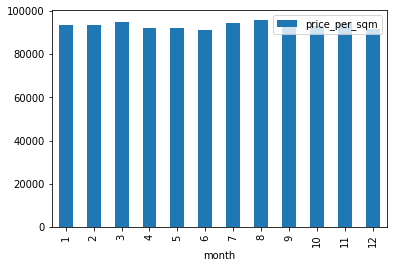

In [243]:
pivot_month = df_query.pivot_table(index='month', values ='price_per_sqm', aggfunc='median')
pivot_month.plot(y='price_per_sqm', kind ='bar')
print(pivot_month)

Самы дешевые квартиры в мае и июне

      price_per_sqm
year               
2015        90418.0
2016        91666.7
2017        91639.1
2018        95161.3
2019       103092.8


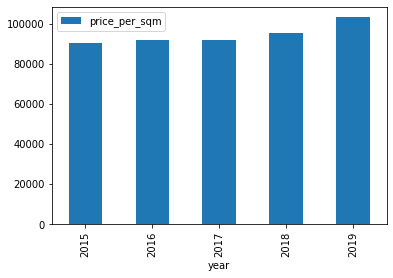

In [244]:
pivot_year = df_query.pivot_table(index='year', values ='price_per_sqm', aggfunc='median')
pivot_year.plot(y='price_per_sqm', kind ='bar')
print(pivot_year)

Цены резко упали в 2015-ом и поднялись в 2019-ом

**Зависимость цены от местности**

In [245]:
pivot_locality = df_query.pivot_table(index='locality_name', values ='price_per_sqm', aggfunc=['count','median'])
pivot_locality.columns = ['count', 'median']
pivot_locality.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,10102,102876.20
посёлок мурино,407,86351.40
посёлок шушары,327,76315.80
всеволожск,266,66245.70
колпино,243,72413.80
посёлок парголово,232,90465.25
пушкин,231,97625.30
деревня кудрово,230,92637.75
гатчина,197,66666.70


**Выделение центра СПБ**

In [246]:
df_query['center_km'] = round(df_query['cityCenters_nearest'] / 1000, 0)
df_query['center_km'] = df_query['center_km'].astype('int', errors='ignore')

In [247]:
df_query.loc[(df_query['locality_name'] == 'санкт-петербург') & (df_query['center_km'].notna()), 'center_km'].apply(round)
spb_data = df_query.query('locality_name == "санкт-петербург"')
spb_center_nearest = spb_data.pivot_table(index='center_km', values=['price_per_sqm', 'last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price,price_per_sqm
center_km,,
0.0,8795000.0,109031.65
1.0,10200000.0,125565.60
2.0,9000000.0,119354.65
3.0,7800000.0,109872.70
4.0,8299000.0,113636.40


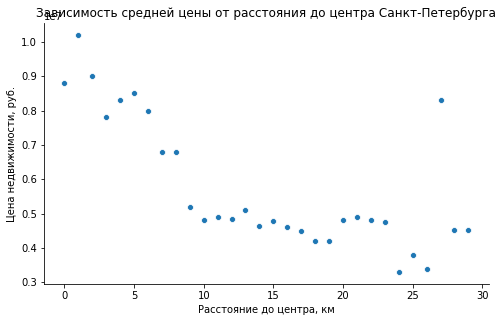

In [248]:
sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=5, aspect=1.4)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Как видно из графика, есть скачок цены в радиусе 8 км, этот радиус будем считать центром

<div class="alert alert-success">
<h2> Комментарии от ревьюера, проверка №1</h2>
    
Согласен, супер)
</div>

In [249]:
spb_center = df_query.query('locality_name == "санкт-петербург" and center_km <= 8')
spb_center.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,part_living_area,part_kitchen_area,price_per_sqm,weekday,month,year,floor_category,living_area_ratio,kitchen_area_ratio,center_km
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0.32,0.41,100000.0,1,6,2018,другой,0.320,0.410,8.0
24,8,6500000,97.2,2015-10-31,2,2.80,3,46.5,1,False,...,0.48,0.20,66872.4,5,10,2015,первый,0.478,0.202,2.0
63,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,0.58,0.14,169491.5,1,9,2018,другой,0.576,0.136,5.0
99,32,9600000,90.0,2017-09-26,4,2.55,5,67.0,2,False,...,0.74,0.09,106666.7,1,9,2017,другой,0.744,0.089,3.0
111,4,4590000,40.0,2017-05-29,1,3.00,6,18.0,1,False,...,0.45,0.25,114750.0,0,5,2017,первый,0.450,0.250,6.0


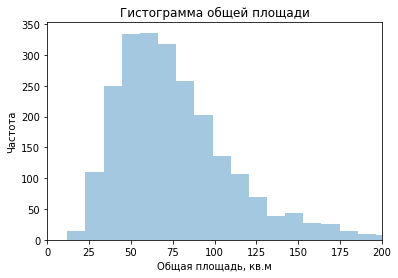

In [250]:
sns.distplot(spb_center['total_area'], kde=False, bins=45)
plt.xlim(0, 200)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Частота')
plt.show()

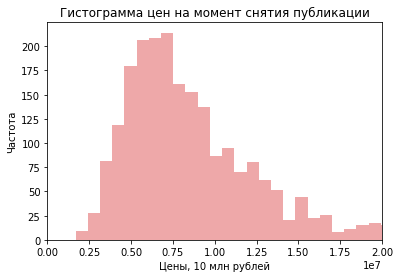

In [251]:
sns.distplot(spb_center['last_price'], kde=False, bins=450, color='tab:red')
plt.xlim(0, 20000000)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цены, 10 млн рублей')
_ = plt.ylabel('Частота')

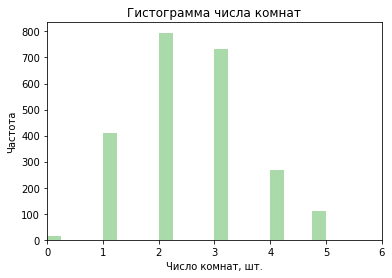

In [252]:
sns.distplot(spb_center['rooms'], kde=False, bins=20, color='tab:green')
plt.xlim(0, 6)
plt.title('Гистограмма числа комнат')
plt.xlabel('Число комнат, шт.')
_ = plt.ylabel('Частота')

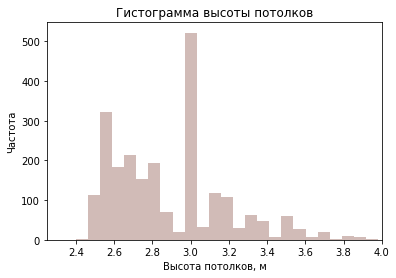

In [253]:
sns.distplot(spb_center['ceiling_height'], kde=False, bins=25, color='tab:brown')
plt.xlim(2.25, 4)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков, м')
_ = plt.ylabel('Частота')

    В среднем в центре Спб продаются 2-х комнатные квартиры с площадью 50-70 кв.м. с высото потолков 3 метра, цена которых 50-100 млн.руб 

       price_per_sqm
rooms               
0           132796.6
1           136923.1
2           121134.0
3           110947.4
4           108490.6
5            97540.5


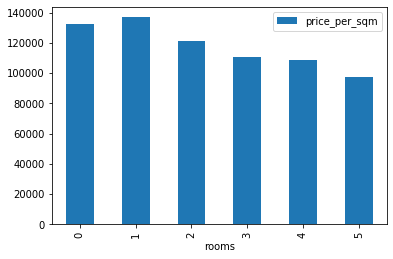

In [254]:
pivot_rooms_spb = spb_center.pivot_table(index='rooms', values='price_per_sqm', aggfunc='median')
pivot_rooms_spb.plot(y='price_per_sqm', kind ='bar')
print(pivot_rooms_spb)

Чем больше комнат, тем ниже цена

                price_per_sqm
floor_category               
другой              124468.10
первый              106927.55
последний           114000.00


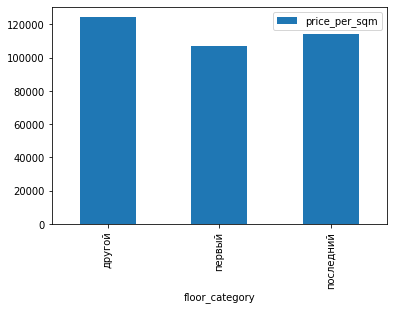

In [255]:
pivot_floor_spb = spb_center.pivot_table(index='floor_category', values='price_per_sqm', aggfunc='median')
pivot_floor_spb.plot(y='price_per_sqm', kind ='bar')
print(pivot_floor_spb)

Выше цена если это не первый и не последний этаж. Самая низкая цена на первых этажах

           price_per_sqm
center_km               
0.0            109031.65
1.0            125565.60
2.0            119354.65
3.0            109872.70
4.0            113636.40
5.0            126112.80
6.0            124529.40
7.0            121351.40
8.0            117451.90


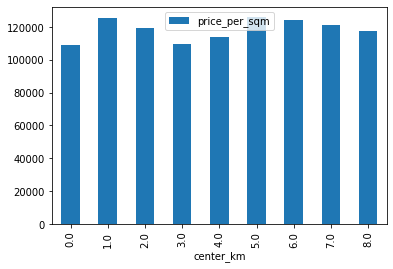

In [256]:
pivot_center_km = spb_center.pivot_table(index='center_km', values='price_per_sqm', aggfunc='median')
pivot_center_km.plot(y='price_per_sqm', kind ='bar')
print(pivot_center_km)

Цена колеблется 

         price_per_sqm
weekday               
0            122154.40
1            117850.30
2            120401.35
3            117741.90
4            119047.60
5            124390.20
6            126811.60


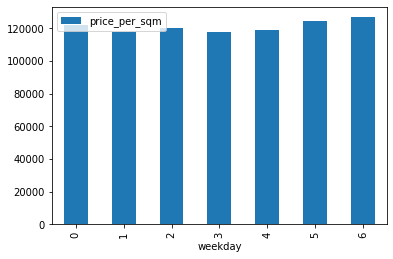

In [257]:
pivot_weekday_spb = spb_center.pivot_table(index='weekday', values ='price_per_sqm', aggfunc='median')
pivot_weekday_spb.plot(y='price_per_sqm', kind ='bar')
print(pivot_weekday_spb)

Цена равномерная

       price_per_sqm
month               
1          119178.10
2          119369.30
3          131428.60
4          115281.60
5          129120.90
6          117977.20
7          116753.20
8          124264.05
9          119252.90
10         117370.90
11         119785.65
12         114709.55


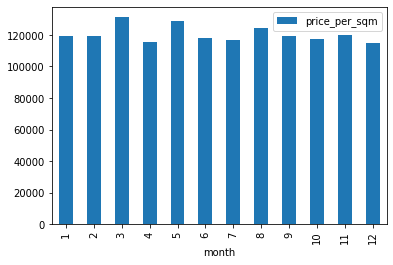

In [258]:
pivot_month_spb = spb_center.pivot_table(index='month', values ='price_per_sqm', aggfunc='median')
pivot_month_spb.plot(y='price_per_sqm', kind ='bar')
print(pivot_month_spb)

Цена выше в марте и в мае

      price_per_sqm
year               
2015      107389.00
2016      117337.65
2017      118034.80
2018      122548.70
2019      126966.30


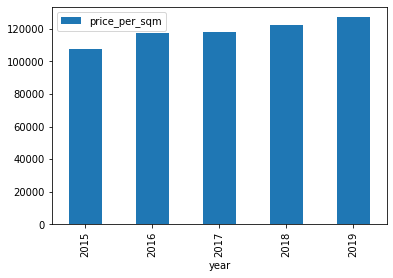

In [259]:
pivot_year_spb = spb_center.pivot_table(index='year', values ='price_per_sqm', aggfunc='median')
pivot_year_spb.plot(y='price_per_sqm', kind ='bar')
print(pivot_year_spb)

Цена с каждым годом повышается - хорошая инвестиция 

Цены общей выборки отличаются от цен выборки по центру города Спб, но и есть схожести, такие как этаж квартиры

### Шаг 5. Общий вывод

Чем больше площадь квартира, тем выше цена \ 
цена кваритры выше, если она находится не на первом и не на последнем этаже \ 
Квартиры, размещенные в будние дни, в среднем дороже, чем в выходные \
Цены на квартиры находящиеся больше, чем радиусе 8-9 км резко падают

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод